<a href="https://colab.research.google.com/github/creamcheesesteak/test_deeplearning/blob/master/boston_housing_withregression_advanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets.boston_housing import load_data

In [2]:
(x_train, y_train), (x_test, y_test) = load_data(path='boston_housing.npz', test_split=0.2, seed=113)
x_train.shape, y_train.shape, x_test.shape, y_test.shape


((404, 13), (404,), (102, 13), (102,))

In [3]:
import pandas as pd

In [4]:
df = pd.DataFrame(x_train)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       404 non-null    float64
 1   1       404 non-null    float64
 2   2       404 non-null    float64
 3   3       404 non-null    float64
 4   4       404 non-null    float64
 5   5       404 non-null    float64
 6   6       404 non-null    float64
 7   7       404 non-null    float64
 8   8       404 non-null    float64
 9   9       404 non-null    float64
 10  10      404 non-null    float64
 11  11      404 non-null    float64
 12  12      404 non-null    float64
dtypes: float64(13)
memory usage: 41.2 KB


In [5]:
import sqlite3

In [6]:
connect = sqlite3.connect('./db.sqlite')

In [7]:
df.to_sql('boston_housing_resource', connect, if_exists='append', index=False) # save

In [8]:
df = pd.read_sql_query('select * from boston_housing_resource', connect) # load

In [9]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000
mean,2.496740,7.653465,7.402954,0.041254,0.371571,4.178054,46.007096,2.493514,6.293729,270.599010,12.317327,236.522112,8.493878
std,7.764436,20.140166,7.657434,0.610896,0.641759,3.066626,39.738247,2.487628,8.397211,234.660735,8.914986,184.091390,8.453641
min,-0.405101,-0.483615,-1.564696,-0.256833,-1.471269,-3.817250,-2.369042,-1.287503,-0.971569,-1.311311,-2.673752,-3.771101,-1.519664
25%,-0.007371,0.000000,1.028326,-0.256833,0.404000,0.490780,0.899065,0.679454,1.000000,1.565287,0.784476,0.439140,0.601290
50%,0.127440,0.000000,5.130000,0.000000,0.507000,5.874500,45.350000,2.111400,4.000000,279.000000,17.150000,374.635000,6.880000
75%,1.082620,0.358906,15.040000,0.000000,0.631000,6.398000,88.000000,3.998600,6.000000,403.000000,20.200000,394.080000,14.190000
max,88.976200,100.000000,27.740000,3.893584,2.677335,8.725000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000


In [10]:
type(x_train), type(y_train), type(x_test), type(y_test)

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [11]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000
mean,2.496740,7.653465,7.402954,0.041254,0.371571,4.178054,46.007096,2.493514,6.293729,270.599010,12.317327,236.522112,8.493878
std,7.764436,20.140166,7.657434,0.610896,0.641759,3.066626,39.738247,2.487628,8.397211,234.660735,8.914986,184.091390,8.453641
min,-0.405101,-0.483615,-1.564696,-0.256833,-1.471269,-3.817250,-2.369042,-1.287503,-0.971569,-1.311311,-2.673752,-3.771101,-1.519664
25%,-0.007371,0.000000,1.028326,-0.256833,0.404000,0.490780,0.899065,0.679454,1.000000,1.565287,0.784476,0.439140,0.601290
50%,0.127440,0.000000,5.130000,0.000000,0.507000,5.874500,45.350000,2.111400,4.000000,279.000000,17.150000,374.635000,6.880000
75%,1.082620,0.358906,15.040000,0.000000,0.631000,6.398000,88.000000,3.998600,6.000000,403.000000,20.200000,394.080000,14.190000
max,88.976200,100.000000,27.740000,3.893584,2.677335,8.725000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000


In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [14]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, x_test.shape

((404, 13), (102, 13))

In [15]:
df= pd.DataFrame(x_train)
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02
mean,-1.015414e-16,1.099231e-17,1.743380e-15,-1.266863e-16,-5.253773e-15,6.414149e-15,2.984411e-16,4.946538e-16,1.126711e-17,-1.981363e-16,2.366864e-14,5.956800e-15,6.139204e-16
std,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00
min,-4.051005e-01,-4.836155e-01,-1.564696e+00,-2.568327e-01,-1.471269e+00,-3.817250e+00,-2.369042e+00,-1.287503e+00,-9.715693e-01,-1.311311e+00,-2.673752e+00,-3.771101e+00,-1.519664e+00
25%,-3.969615e-01,-4.836155e-01,-8.782218e-01,-2.568327e-01,-8.908055e-01,-5.534305e-01,-8.433882e-01,-8.202251e-01,-6.262491e-01,-7.636737e-01,-5.692381e-01,2.116008e-01,-8.075036e-01
50%,-3.766520e-01,-4.836155e-01,-2.079167e-01,-2.568327e-01,-1.652266e-01,-9.674263e-02,3.400464e-01,-2.949009e-01,-5.111423e-01,-4.567563e-01,2.839433e-01,3.879673e-01,-1.857436e-01
75%,-7.617386e-03,4.296024e-02,1.028326e+00,-2.568327e-01,6.286420e-01,4.823165e-01,8.990647e-01,6.794540e-01,1.675886e+00,1.565287e+00,7.844764e-01,4.401777e-01,6.005999e-01
max,9.234847e+00,3.728990e+00,2.445374e+00,3.893584e+00,2.677335e+00,3.467186e+00,1.110488e+00,3.437406e+00,1.675886e+00,1.836097e+00,1.603531e+00,4.480771e-01,3.482019e+00


In [16]:
df.to_sql('boston_housing_scale_xtrain', connect , if_exists='append', index=False)

In [17]:
dfr = pd.read_sql_query('select * from boston_housing_scale_xtrain', connect)

# Model and fit

In [18]:
model = tf.keras.models.Sequential()

In [19]:
model.add(tf.keras.Input(shape=(13, ))) # input layer # input은 언제나 column
model.add(tf.keras.layers.Dense(128, activation='relu')) # hidden layer
model.add(tf.keras.layers.Dense(128, activation='relu')) # hidden layer
model.add(tf.keras.layers.Dense(128, activation='relu')) # hidden layer
model.add(tf.keras.layers.Dense(64, activation='relu')) # hidden layer
model.add(tf.keras.layers.Dense(32, activation='relu')) # hidden layer
model.add(tf.keras.layers.Dense(1)) # output layer

# sdg = tf.keras.optimizers.SGD(
#     learning_rate=0.001,
#     momentum=0.004,
# )

# model.compile(optimizer='sgd', loss='mse', metrics=['mae'])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

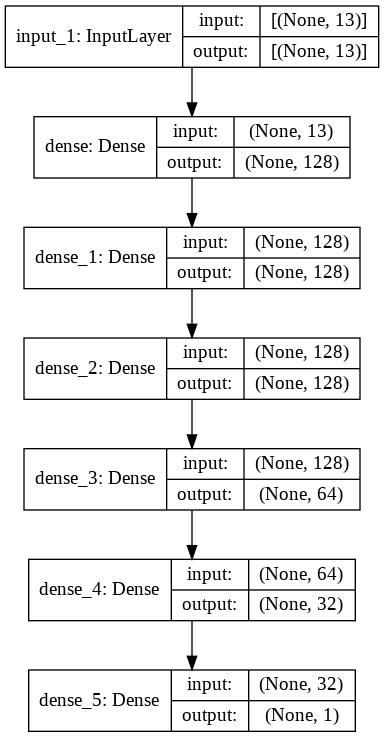

In [20]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1792      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 45,185
Trainable params: 45,185
Non-trainable params: 0
____________________________________________________

In [31]:
hist = model.fit(x_train, y_train, epochs=500, validation_split=0.3)

Epoch 1/500
9/9 [==============================] - 0s 8ms/step - loss: 0.2613 - mae: 0.3668 - val_loss: 2.2860 - val_mae: 1.0563
Epoch 2/500
9/9 [==============================] - 0s 5ms/step - loss: 0.2076 - mae: 0.3551 - val_loss: 2.2358 - val_mae: 1.0779
Epoch 3/500
9/9 [==============================] - 0s 6ms/step - loss: 0.2329 - mae: 0.3689 - val_loss: 2.3761 - val_mae: 1.0289
Epoch 4/500
9/9 [==============================] - 0s 4ms/step - loss: 0.2191 - mae: 0.3485 - val_loss: 2.4555 - val_mae: 1.0764
Epoch 5/500
9/9 [==============================] - 0s 4ms/step - loss: 0.1074 - mae: 0.2546 - val_loss: 2.3125 - val_mae: 1.0491
Epoch 6/500
9/9 [==============================] - 0s 4ms/step - loss: 0.1188 - mae: 0.2641 - val_loss: 2.3181 - val_mae: 1.0447
Epoch 7/500
9/9 [==============================] - 0s 6ms/step - loss: 0.1046 - mae: 0.2372 - val_loss: 2.0137 - val_mae: 1.0006
Epoch 8/500
9/9 [==============================] - 0s 4ms/step - loss: 0.1126 - mae: 0.2366 - val

# evaluation

In [32]:
hist.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [37]:
import matplotlib.pyplot as plt

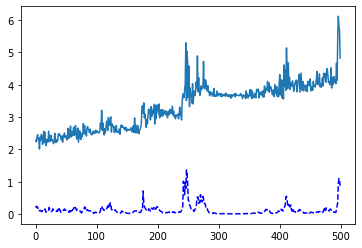

In [38]:
plt.plot(hist.history['loss'], 'b--')
plt.plot(hist.history['val_loss'])
plt.show()

In [23]:
model.evaluate(x_train, y_train) # activation = sigmoid loss: 8.4523 - mae: 2.1573

13/13 [==============================] - 0s 1ms/step - loss: 0.1798 - mae: 0.3144


[0.1798359900712967, 0.31438153982162476]

In [24]:
model.evaluate(x_train, y_train) # activation = relu loss: 4.3601 - mae: 1.4995 

13/13 [==============================] - 0s 1ms/step - loss: 0.1798 - mae: 0.3144


[0.1798359900712967, 0.31438153982162476]

# service

In [25]:
x_test[10]

array([-0.380999  , -0.48361547, -0.37402299, -0.25683275, -0.31887859,
        0.1945502 ,  0.58730449, -0.50578021, -0.51114231, -0.13178499,
        1.10299743, -3.02127105, -0.29132553])

In [26]:
model.predict([[2.2876e-01, 0.0000e+00, 8.5600e+00, 0.0000e+00, 5.2000e-01,
       6.4050e+00, 8.5400e+01, 2.7147e+00, 5.0000e+00, 3.8400e+02,
       2.0900e+01, 7.0800e+01, 1.0630e+01]])

array([[1344.2085]], dtype=float32)

In [27]:
y_train[10]

12.1

# Tensorboard lab